<a href="https://colab.research.google.com/github/abithaab/abitha-ml-project/blob/main/Project2_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. What features indicate spam?

Spam messages often contain:

Words like “free,” “win,” “cash,” “prize,” “urgent”

Excessive punctuation (!!!, ??)

URLs or phone numbers

Capitalized words or all caps

Short or very long messages

Repeated words or emojis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import nltk
from nltk.corpus import stopwords
import re

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2. How to clean and tokenize text?

Cleaning:

Convert text to lowercase

Remove punctuation and numbers

Remove extra spaces

Remove stopwords (common words like “is,” “the,” “and”)

Tokenization:

Split text into words or n-grams (groups of consecutive words)

Example: "Win free cash now!" → ["win", "free", "cash", "now"]

In [ ]:
# Load dataset (use your CSV file path)
# Example dataset: https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1','v2']]
df.columns = ['label', 'message']

# Encode labels (ham=0, spam=1)
df['label_num'] = df.label.map({'ham':0, 'spam':1})

df.head()


,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


3. What is TF-IDF?

Term Frequency – Inverse Document Frequency

Measures how important a word is in a document relative to all documents.

TF: How often a word appears in a message

IDF: Reduces weight for words common across all messages

Helps highlight distinctive spam words while ignoring common words.

In [ ]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'\W', ' ', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    words = [word for word in text.split() if word not in stop_words]  # remove stopwords
    return ' '.join(words)

df['clean_msg'] = df['message'].apply(clean_text)
df.head()


,label,message,label_num,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think goes usf lives around though


4. What is precision vs recall?

Precision: Out of messages predicted as spam, how many are actually spam.

Precision
=
True Positives
True Positives + False Positives
Precision=
True Positives + False Positives
True Positives
	​


Recall: Out of actual spam messages, how many were correctly detected.

Recall
=
True Positives
True Positives + False Negatives
Recall=
True Positives + False Negatives
True Positives
	​


Precision vs Recall Example:

High precision → fewer false alarms

High recall → fewer spam messages missed

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['clean_msg'])
y = df['label_num']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5. How to handle class imbalance?

Class imbalance: More ham than spam messages

Techniques to handle:

Oversampling minority class (e.g., SMOTE)

Undersampling majority class

Assign class weights in the model

Use balanced datasets for training

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


6. What is confusion matrix?

A table showing model predictions vs actual labels:

	Predicted Ham	Predicted Spam
Actual Ham	True Negative	False Positive
Actual Spam	False Negative	True Positive

Helps evaluate accuracy, precision, recall, and false positives

Accuracy: 0.9623318385650225


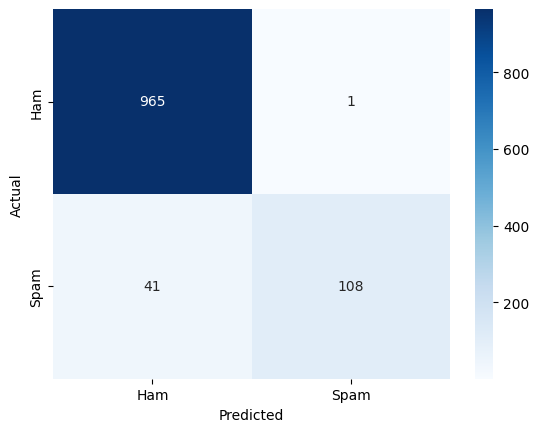

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



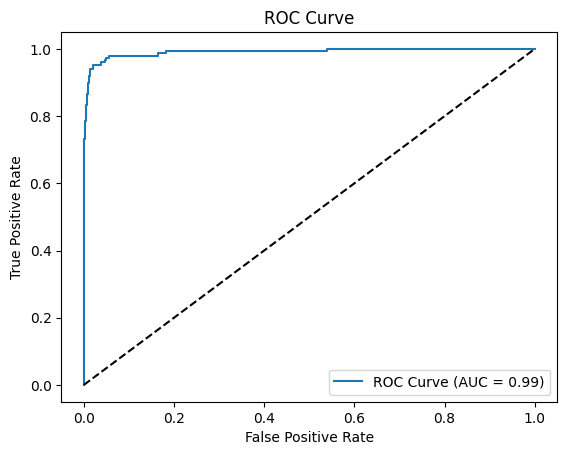

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


7. How to improve accuracy?

Feature engineering: use n-grams, message length, punctuation counts

Try TF-IDF or CountVectorizer

Handle class imbalance

Tune hyperparameters of logistic regression

Try other models like Random Forest, SVM, or ensemble methods

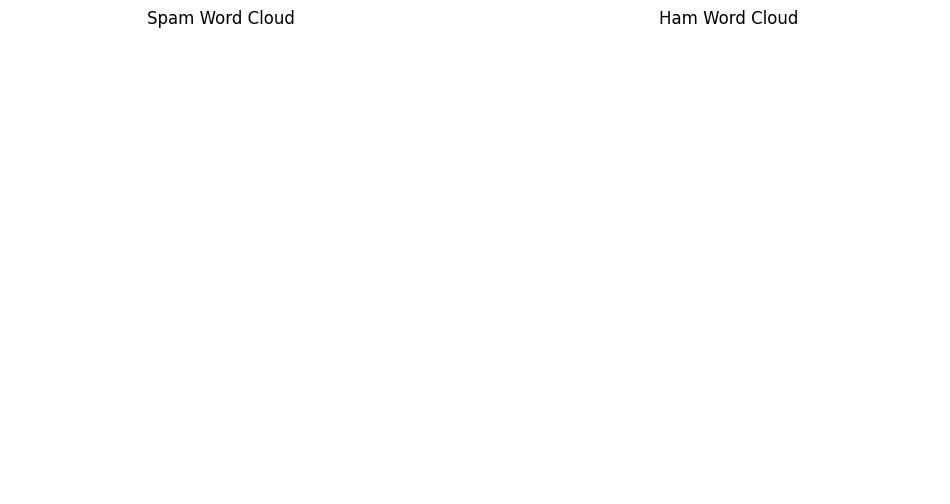

In [ ]:
from wordcloud import WordCloud

spam_words = ' '.join(df[df['label_num']==1]['clean_msg'])
ham_words = ' '.join(df[df['label_num']==0]['clean_msg'])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
WordCloud(width=600, height=400, background_color='white').generate(spam_words)
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1,2,2)
WordCloud(width=600, height=400, background_color='white').generate(ham_words)
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()


8. What are false positives?

Messages wrongly predicted as spam when they are actually ham

Example: "Call me later" classified as spam → False Positive

Important because false positives can annoy users

9. How does logistic regression work?

Logistic Regression predicts probability of an event (spam vs ham)

Uses sigmoid function to map input features to a probability between 0 and 1:

𝑃
(
𝑦
=
1
∣
𝑋
)
=
1
1
+
𝑒
−
(
𝛽
0
+
𝛽
1
𝑋
1
+
.
.
.
+
𝛽
𝑛
𝑋
𝑛
)
P(y=1∣X)=
1+e
−(β
0
	​

+β
1
	​

X
1
	​

+...+β
n
	​

X
n
	​

)
1
	​


If probability > 0.5 → classify as spam, else ham

10. How to visualize spam patterns?

Word clouds: show most frequent words in spam and ham messages

Bar charts: top spam keywords

Heatmaps: correlation between features

Helps understand patterns and explain model predictions

11. What is the role of stopwords in text classification?

Stopwords are common words like “is,” “the,” “and” that do not carry much meaning.

Removing them reduces noise in the dataset and improves model performance.

12. How to convert text data into numerical features for logistic regression?

Text must be converted to numbers because ML models cannot process raw text.

Methods:

CountVectorizer: counts word occurrences

TF-IDF Vectorizer: weighs words by importance across the dataset

13. What is overfitting and how to prevent it in spam detection?

Overfitting: Model performs well on training data but poorly on unseen data.

Prevention techniques:

Use cross-validation

Apply regularization (L1 or L2)

Keep the model simple

Avoid using too many rare words as features

14. What evaluation metrics besides accuracy can be used?

Precision: correctly predicted spam messages / total predicted spam

Recall: correctly predicted spam / total actual spam

F1-score: harmonic mean of precision and recall

ROC-AUC: measures probability discrimination ability

Confusion matrix: shows true/false positives and negatives

15. How to deploy a spam detection model for real-time SMS filtering?

Train and save the model using pickle or joblib

Create a preprocessing function to clean and vectorize new messages

Use model.predict() to detect spam in incoming messages

Integrate with an application or SMS service for real-time spam detection